In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [19]:
df = pd.read_csv("/content/drive/MyDrive/BigMart.csv")



In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
df.shape


(14204, 12)

In [24]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,2439
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,4016
Outlet_Location_Type,0


In [25]:
df = df.dropna()


In [27]:
df.isnull().sum().sum()

0

In [28]:
df['Item_Type'] = df['Item_Type'].replace({'Soft Drinks': 'S Drinks', 'Baking Goods': 'Baking', 'Snack Foods': 'Snacks',
                                           'Fruits and Vegetables': 'Fruit/Veggies','Health and Hygiene':'Health','Frozen Foods':'Frozen',
                                            'Hard Drinks':'H Drinks', 'Starchy Foods': 'Starchy'})


In [29]:
df_mrp = df.groupby('Item_Type').sum()


In [30]:
print(df['Outlet_Identifier'].unique())


['OUT049' 'OUT018' 'OUT013' 'OUT046' 'OUT035']


In [31]:
df_outlet_049 = df.loc[df.Outlet_Identifier == 'OUT049']
df_outlet_018 = df.loc[df.Outlet_Identifier == 'OUT018']
df_outlet_013 = df.loc[df.Outlet_Identifier == 'OUT013']
df_outlet_046 = df.loc[df.Outlet_Identifier == 'OUT046']
df_outlet_035 = df.loc[df.Outlet_Identifier == 'OUT035']


In [32]:
df_outlet_049_items = df_outlet_049.groupby('Item_Type').sum()
df_outlet_018_items = df_outlet_018.groupby('Item_Type').sum()
df_outlet_013_items = df_outlet_013.groupby('Item_Type').sum()
df_outlet_046_items = df_outlet_046.groupby('Item_Type').sum()
df_outlet_035_items = df_outlet_035.groupby('Item_Type').sum()


In [33]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.920,Regular,0.019278,S Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
5,FDP36,10.395,Regular,0.000000,Baking,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.608800
...,...,...,...,...,...,...,...,...,...,...,...,...
14196,FDF46,7.070,Low Fat,0.094053,Snacks,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1691.772707
14197,DRL35,15.700,Low Fat,0.030704,H Drinks,43.2770,OUT046,1997,Small,Tier 1,Supermarket Type1,612.708246
14198,FDW46,13.000,Regular,0.070411,Snacks,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1,1001.645945
14199,FDB58,10.500,Regular,0.013496,Snacks,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2213.476465


In [34]:
df_mrp.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Type,,,,,,,,,,,
Baking,FDP36FDL12FDL12FDA47FDB36FDE36FDY24FDG24FDY59F...,7285.675,RegularRegularRegularRegularRegularRegularRegu...,36.191862,75539.6204,OUT018OUT046OUT013OUT013OUT018OUT035OUT049OUT0...,1187520,MediumSmallHighHighMediumSmallMediumHighMedium...,Tier 3Tier 1Tier 3Tier 3Tier 3Tier 2Tier 1Tier...,Supermarket Type2Supermarket Type1Supermarket ...,1.171811e+06
Breads,FDW11FDO23FDP59FDT59FDU11FDQ23FDN23FDZ35FDS47F...,2501.525,Low FatLow FatRegularLow FatLow FatLow FatRegu...,14.617219,31457.3396,OUT018OUT018OUT018OUT035OUT013OUT035OUT035OUT0...,447823,MediumMediumMediumSmallHighSmallSmallSmallMedi...,Tier 3Tier 3Tier 3Tier 2Tier 3Tier 2Tier 2Tier...,Supermarket Type2Supermarket Type2Supermarket ...,5.111247e+05
Breakfast,FDP49FDP49FDL25FDM01FDO13FDQ49FDQ37FDN13FDM13F...,1302.250,RegularRegularRegularRegularLow FatRegularLow ...,7.610033,13616.1940,OUT046OUT049OUT049OUT035OUT013OUT013OUT046OUT0...,199920,SmallMediumMediumSmallHighHighSmallSmallHighHi...,Tier 1Tier 1Tier 1Tier 2Tier 3Tier 3Tier 1Tier...,Supermarket Type1Supermarket Type1Supermarket ...,2.149229e+05
Canned,FDC02FDL50FDR13FDH14FDJ38FDG02FDV25FDL50FDS49F...,7336.830,Low FatRegularRegularRegularRegularLow FatLow ...,36.356386,82259.2298,OUT018OUT013OUT013OUT013OUT035OUT018OUT018OUT0...,1187530,MediumHighHighHighSmallMediumMediumMediumSmall...,Tier 3Tier 3Tier 3Tier 3Tier 2Tier 3Tier 3Tier...,Supermarket Type2Supermarket Type1Supermarket ...,1.273614e+06
Dairy,FDA15FDA03FDU02FDU02DRG27FDD03FDU50DRC27DRJ51F...,8203.145,Low FatRegularLow FatLow FatLow FatLow FatRegu...,40.166618,90962.7834,OUT049OUT046OUT035OUT046OUT049OUT046OUT013OUT0...,1239504,MediumSmallSmallSmallMediumSmallHighSmallSmall...,Tier 1Tier 1Tier 2Tier 1Tier 1Tier 1Tier 3Tier...,Supermarket Type1Supermarket Type1Supermarket ...,1.374643e+06


<Axes: title={'center': 'Outlet Establishment Year'}, xlabel='Outlet_Establishment_Year', ylabel='count'>

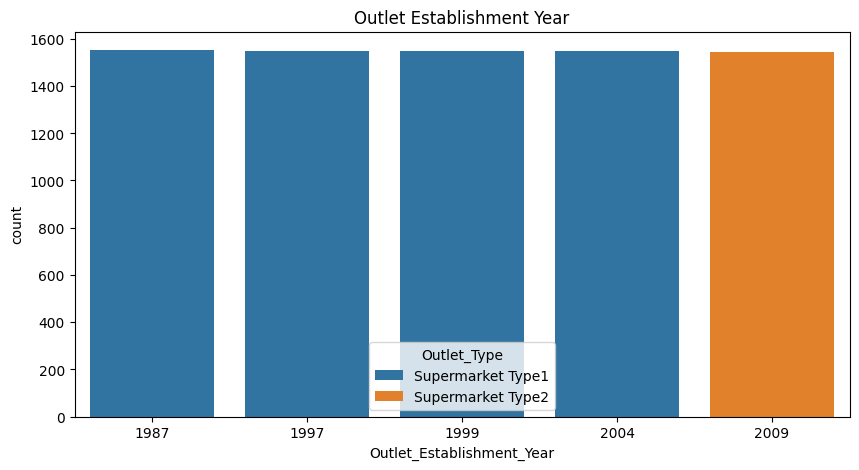

In [35]:
plt.figure(figsize = (10,5))
#plt.subplot(1,2,1)

plt.title("Outlet Establishment Year")
sns.countplot(x = 'Outlet_Establishment_Year', hue = 'Outlet_Type', data = df)


<Axes: title={'center': 'Outlet Establishment Year'}, ylabel='count'>

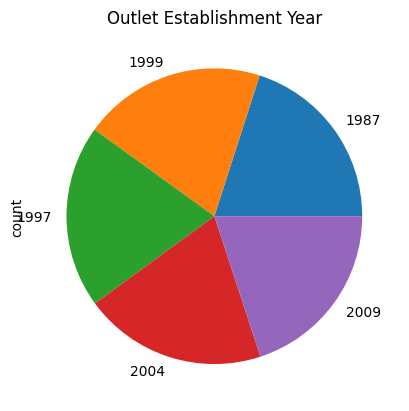

In [36]:
df['Outlet_Establishment_Year'].value_counts().plot(kind='pie', title = "Outlet Establishment Year")


<Axes: title={'center': 'Outlet Size'}, ylabel='count'>

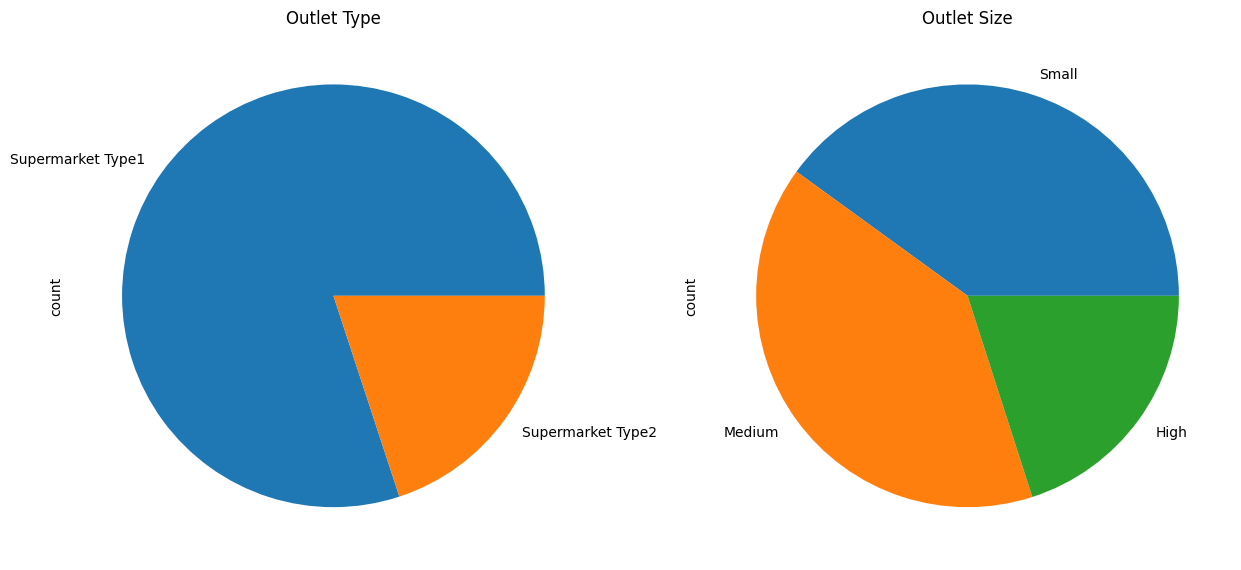

In [37]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title("Outlet Type")
df['Outlet_Type'].value_counts().plot(kind='pie', title = "Outlet Type")

plt.subplot(1,2,2)
plt.title("Outlet Size ")
df['Outlet_Size'].value_counts().plot(kind='pie', title = "Outlet Size")


<Axes: title={'center': 'Outlet Sizes'}, xlabel='Outlet_Identifier', ylabel='count'>

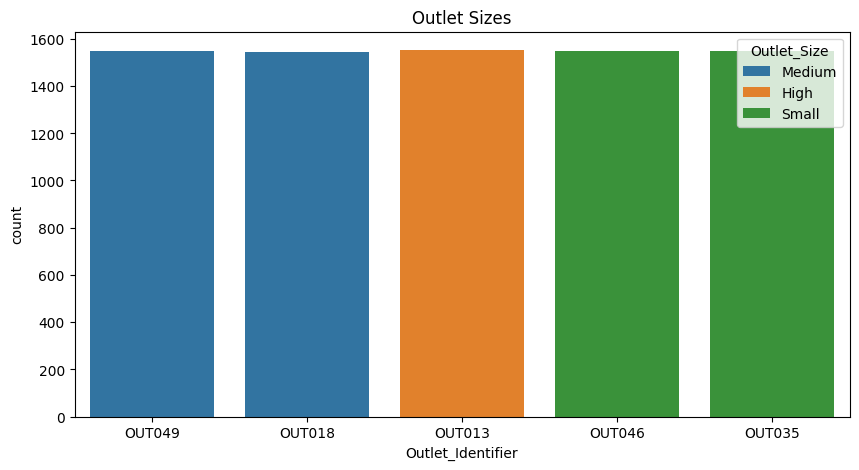

In [38]:
plt.figure(figsize = (10,5))
#plt.subplot(1,2,1)

plt.title("Outlet Sizes")
sns.countplot(x = 'Outlet_Identifier', hue = 'Outlet_Size', data = df)


<Axes: title={'center': 'Outlet Location Type'}, ylabel='count'>

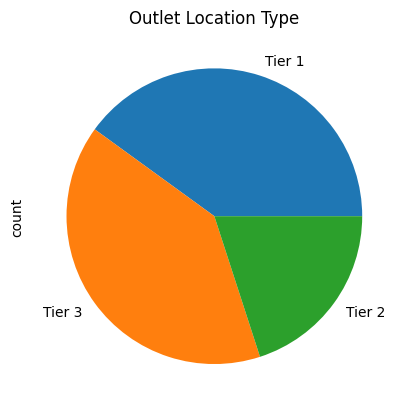

In [39]:
plt.title("Outlet Location Type ")
df['Outlet_Location_Type'].value_counts().plot(kind='pie', title = "Outlet Location Type")


<Axes: title={'center': 'Item Type For All Outlets'}, ylabel='count'>

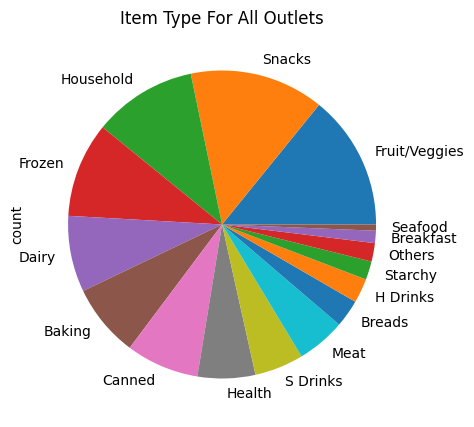

In [40]:
plt.figure(figsize = (10,5))

df['Item_Type'].value_counts().plot(kind='pie', title = "Item Type For All Outlets")


<Axes: title={'center': 'Outlet 035'}, ylabel='count'>

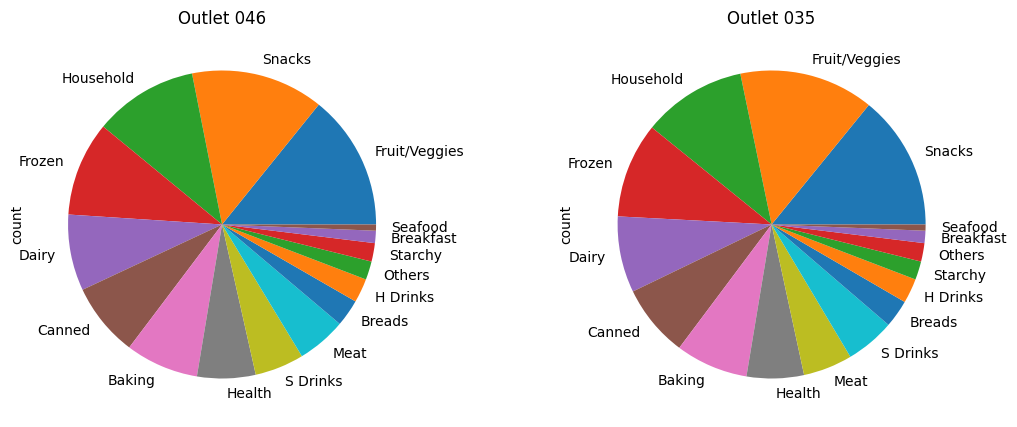

In [41]:
plt.figure(figsize = (13,5))

plt.subplot(1,2,1)
plt.title("Outlet 046")
df[df['Outlet_Identifier'] == 'OUT046']['Item_Type'].value_counts().plot(kind= 'pie')

plt.subplot(1,2,2)
plt.title("Outlet 035")
df[df['Outlet_Identifier'] == 'OUT035']['Item_Type'].value_counts().plot(kind= 'pie')


<Axes: title={'center': 'Items Available in Each Outlet'}, xlabel='Item_Type', ylabel='count'>

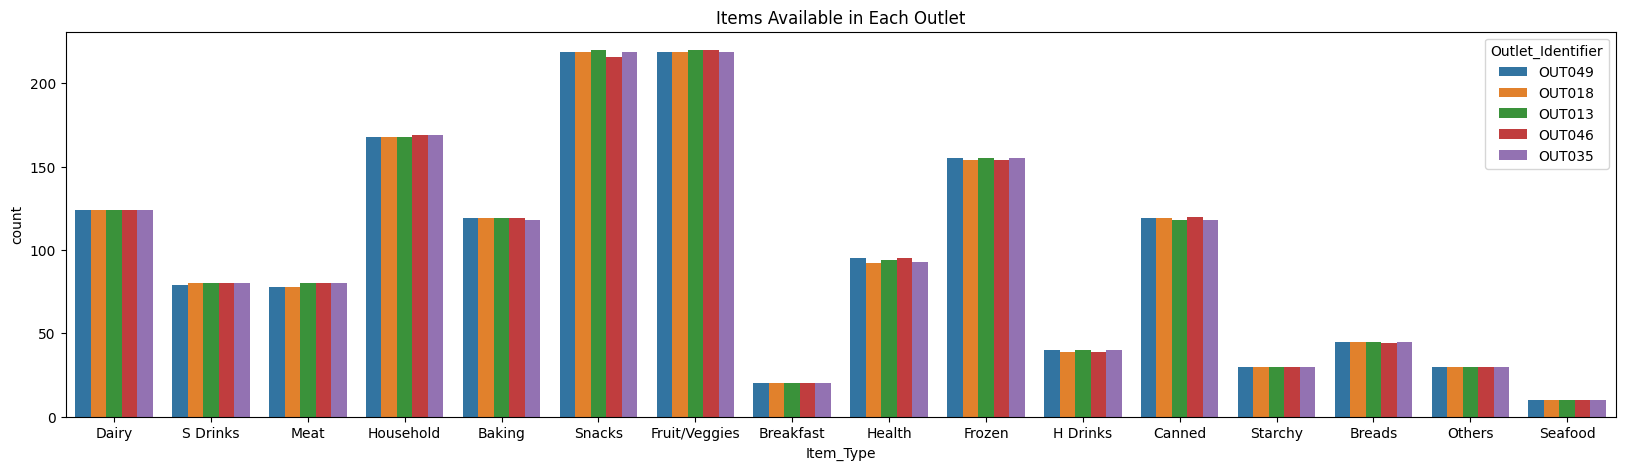

In [42]:
plt.figure(figsize = (20,5))
#plt.subplot(1,2,1)

plt.title("Items Available in Each Outlet")
sns.countplot(x = 'Item_Type', hue = 'Outlet_Identifier', data = df)


<Axes: title={'center': 'Items Available in Supermarkets'}, xlabel='Item_Type', ylabel='count'>

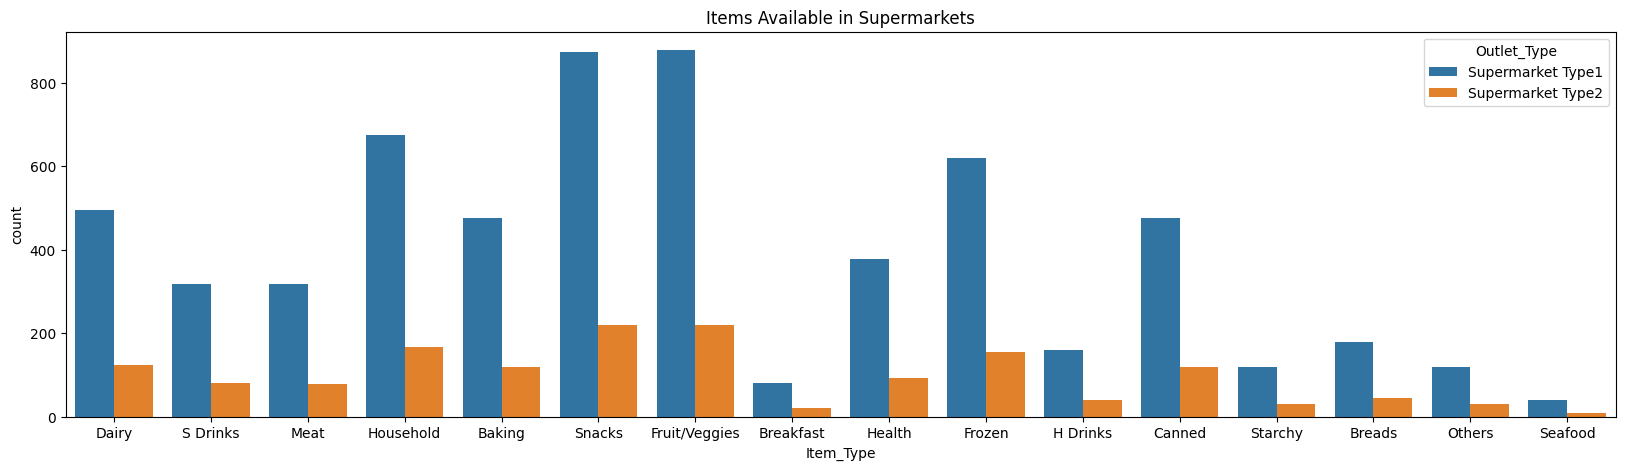

In [43]:
plt.figure(figsize = (20,5))
#plt.subplot(1,2,1)

plt.title("Items Available in Supermarkets")
sns.countplot(x = 'Item_Type', hue = 'Outlet_Type', data = df)


[Text(0.5, 1.0, 'Sales Revenue Outlet 035')]

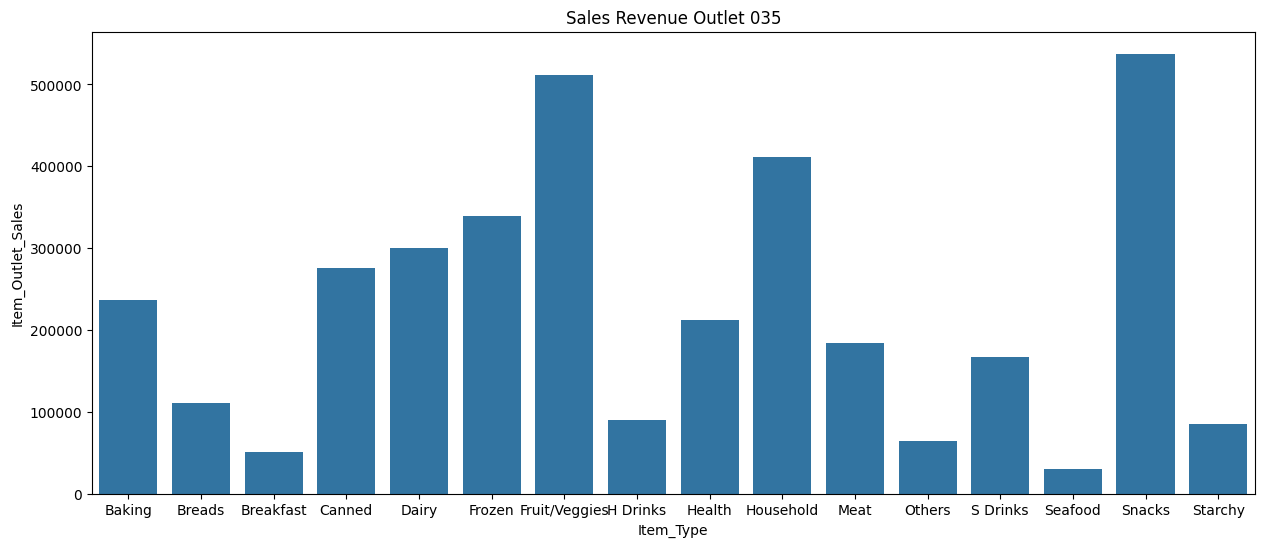

In [44]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_outlet_035_items.index, y=df_outlet_035_items['Item_Outlet_Sales']).set(title='Sales Revenue Outlet 035')


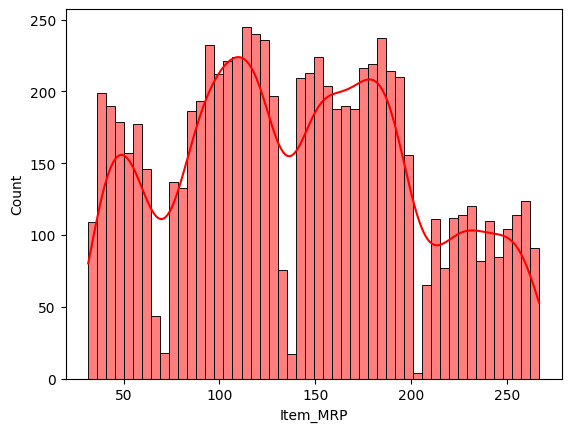

In [49]:
sns.histplot(data=df,x='Item_MRP', bins=50, pthresh=.1, color='red',stat='count',kde=True)
plt.show()


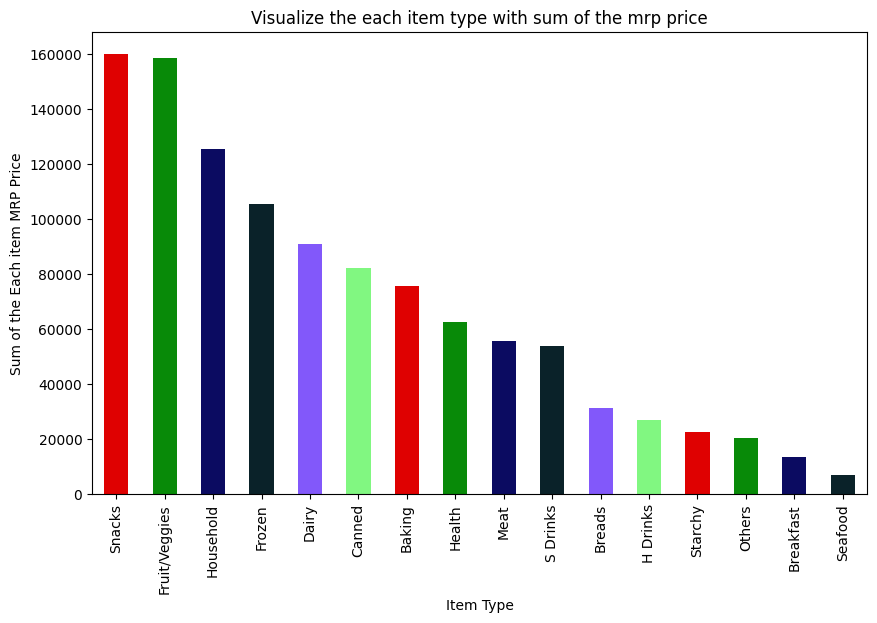

In [50]:
df.groupby('Item_Type')['Item_MRP'].sum().sort_values(ascending=False)\
.plot(kind='bar',title="Visualize the each item type with sum of the mrp price",figsize=(10,6),color=['#DF0101','#088A08','#0B0B61','#0A2229','#8258FA','#81F781'])
plt.xlabel("Item Type")
plt.ylabel("Sum of the Each item MRP Price")
plt.show()
